In [10]:
import sklearn
import mglearn
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [11]:
!ls data

input_test_b1Yip6O.csv input_train.csv        output_train.csv


In [12]:
input_train = pd.read_csv("data/input_train.csv")
output_train = pd.read_csv("data/output_train.csv")

In [13]:
intention_count_df = output_train["intention"].value_counts().reset_index()
intention_count_df.head()

,index,intention
0,28,1796
1,31,565
2,44,560
3,22,461
4,48,387


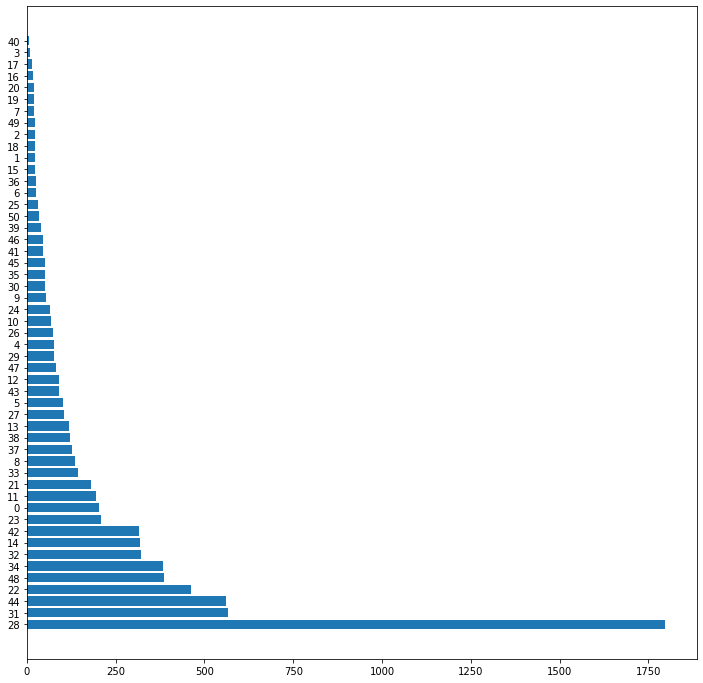

In [14]:
ind = np.arange(intention_count_df.shape[0])
fig, ax = plt.subplots(figsize=(12,12))
rects = ax.barh(ind, intention_count_df["intention"].values)
ax.set_yticks(ind)
ax.set_yticklabels(intention_count_df["index"].values ,rotation='horizontal')
plt.show()

In [15]:
input_train.shape, output_train.shape

((8028, 2), (8028, 2))

In [16]:
input_train.head()

,ID,question
0,0,"bonjour, je m suis trompé de forum pour ma qu..."
1,1,est ce que le motilium me soulagera contre les...
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...
3,3,Est-ce qu'il existe une forme adaptée aux enfa...
4,4,mon medecin me soigne pour une rhino pha...


In [17]:
output_train.head()

,ID,intention
0,0,28
1,1,31
2,2,28
3,3,44
4,4,31


# CountVectorizer with SVC model

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from nltk.corpus import stopwords
import nltk

In [20]:
nltk.download('stopwords')
stop_words_fr = stopwords.words("french")
x_vect_count = CountVectorizer(min_df=5, stop_words=stop_words_fr).fit(input_train["question"])
x_train_count = x_vect_count.transform(input_train["question"])
y = output_train["intention"]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
feature_names = x_vect_count.get_feature_names()
print(" feature len {}\n".format(len(feature_names)))
print("feature begining {} \n".format(feature_names[:20]))
print("feature midlr {} ".format(feature_names[200:220]))

 feature len 2046

feature begining ['00', '10', '100', '100mg', '10h', '10mg', '11', '11h', '12', '12h', '13', '14', '15', '150', '150mg', '15ch', '16', '17', '18', '19'] 

feature midlr ['arnica', 'arret', 'arrete', 'arreter', 'arreté', 'arrive', 'arrivent', 'arriver', 'arrivé', 'arrivée', 'arrivées', 'arréter', 'arrété', 'arrêt', 'arrête', 'arrêter', 'arrêté', 'arrêtée', 'arsenicum', 'aspegic'] 


In [22]:
x_train_count.shape

(8028, 2046)

In [23]:
np.nonzero(x_train_count[:1,:].toarray())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 array([ 145,  300,  348,  467,  490,  541,  550,  794,  805,  885,  887,
         922, 1081, 1105, 1121, 1223, 1302, 1310, 1428, 1453, 1537, 1601,
        1685, 1869, 1905, 1991]))

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_train_count, y)

In [25]:
x_train.shape, y_train.shape

((6021, 2046), (6021,))

In [26]:
svc = SVC().fit(x_train, y_train)

/Users/antoine/Documents/Tests/interview/Posos/posos_interview/venvPosos/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [27]:
svc.score(x_train, y_train), svc.score(x_test, y_test)

(0.22122571001494767, 0.2311908320876931)

# TFIDF vectorizer and gridSearch on SVM param

In [28]:
# need to clean a bit my sentences remove - , : ...
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import nltk
from sklearn.metrics import f1_score

In [29]:
stop_words_fr = stopwords.words("french")
cleaned_sentence_array = [re.sub(",|-|'|\.|\?" ," ", str(row)).lower() for row  in input_train["question"]   ]
cleaned_sentence_array[0]             

'bonjour   je m suis trompé de forum pour ma question alors je la repose ici  je pris pour la première fois hier du paroxétine et ce matin c est une catastrophe  picotement dasn tous le corps annonciateur de sueur froide très très massive et de vomissement  j en suis à deux crises depuis 5 heure du mat  la cela semble passer mes mes mains reste moites et chaude estce normal pour la première fois merci a tous'

In [30]:
input_train["question"]

0       bonjour,  je m suis trompé de forum pour ma qu...
1       est ce que le motilium me soulagera contre les...
2       mon médecin m'a prescrit adenyl. au 2ème cache...
3       Est-ce qu'il existe une forme adaptée aux enfa...
4       mon  medecin  me soigne  pour  une  rhino  pha...
                              ...                        
8023    en combien de temps un antibio n'est plus prés...
8024    j'ai fait vacciner de revaxis mon fils 'année ...
8025    Un patient m’a ramené une ordonnance de 3x1g d...
8026    prise pillule du lendemain, faire une pause en...
8027                                    advil médicament?
Name: question, Length: 8028, dtype: object

In [31]:
y = output_train["intention"]

In [32]:
text_train = TfidfVectorizer(min_df=5, stop_words=stop_words_fr).fit_transform(cleaned_sentence_array)

In [33]:
text_train

<8028x2046 sparse matrix of type '<class 'numpy.float64'>'
	with 59954 stored elements in Compressed Sparse Row format>

In [34]:
x_train_idf, x_test_idf, y_train_idf, y_test_idf = train_test_split(text_train,y)

In [35]:
x_train_idf.shape ,x_test_idf.shape

((6021, 2046), (2007, 2046))

In [36]:
grid = {"C":[0.001,0.01,1,10,100], "gamma":[0.001,0.01,1,10,100]}

In [37]:
gs_idf = GridSearchCV(SVC(), grid, cv=3)

In [38]:
gs_idf.fit(x_train_idf, y_train_idf)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': [0.001, 0.01, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
gs_idf.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
gs_idf.best_score_

0.5975751536289653

In [42]:
gs_idf.score(x_train_idf, y_train_idf), gs_idf.score(x_test_idf, y_test_idf)

(0.9302441454907823, 0.6347782760338814)

In [43]:
pd.DataFrame(gs_idf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.162352,0.025397,0.769652,0.024800,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.222332,0.224327,0.226017,0.224215,0.001507,13
1,1.194869,0.035580,0.783181,0.008217,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.222332,0.224327,0.226017,0.224215,0.001507,13
2,1.253960,0.024602,0.764962,0.022280,0.001,1,"{'C': 0.001, 'gamma': 1}",0.222332,0.224327,0.226017,0.224215,0.001507,13
3,1.332503,0.009859,0.789356,0.014221,0.001,10,"{'C': 0.001, 'gamma': 10}",0.222332,0.224327,0.226017,0.224215,0.001507,13
4,1.625952,0.050824,0.720015,0.009173,0.001,100,"{'C': 0.001, 'gamma': 100}",0.222332,0.224327,0.226017,0.224215,0.001507,13
5,1.158387,0.045073,0.772382,0.008439,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.222332,0.224327,0.226017,0.224215,0.001507,13
6,1.172730,0.010794,0.760697,0.010527,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.222332,0.224327,0.226017,0.224215,0.001507,13
7,2.344112,0.036115,0.767392,0.007460,0.01,1,"{'C': 0.01, 'gamma': 1}",0.222332,0.224327,0.226017,0.224215,0.001507,13
8,3.559976,0.073908,0.775563,0.006988,0.01,10,"{'C': 0.01, 'gamma': 10}",0.222332,0.224327,0.226017,0.224215,0.001507,13
9,3.478414,0.074139,0.768969,0.007021,0.01,100,"{'C': 0.01, 'gamma': 100}",0.222332,0.224327,0.226017,0.224215,0.001507,13


# Try to normalize to improve SVM perf

In [44]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
scaler = MaxAbsScaler()
x_train_scaled = scaler.fit_transform(x_train_idf)
x_test_scaled = scaler.transform(x_test_idf)

In [47]:
grid = {"C":[0.001,0.01,1,10,100], "gamma":[0.001,0.01,1,10,100]}
gs_idf_norm = GridSearchCV(SVC(), grid, cv=3)

In [48]:
gs_idf_norm.fit(x_train_scaled, y_train_idf)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': [0.001, 0.01, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
gs_idf_norm.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
gs_idf_norm.best_score_

0.582295299784089

In [56]:
text_train_l1 = TfidfVectorizer(min_df=5, stop_words=stop_words_fr, norm='l1').fit_transform(cleaned_sentence_array)

In [57]:
x_train_idf_l1, x_test_idf_l1, y_train_idf_l1, y_test_idf_l1 = train_test_split(text_train_l1,y)

In [58]:
gs_grid_l1 = GridSearchCV(SVC(), grid, cv=3)

In [59]:
gs_grid_l1.fit(x_train_idf_l1,y_train_idf_l1)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': [0.001, 0.01, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
gs_grid_l1.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [61]:
gs_grid_l1.best_score_

0.580468360737419

# Try French Stemmer

In [62]:
# Try FRENCH STEMMER
stemmer_fr=nltk.stem.snowball.FrenchStemmer()

In [63]:
def stemming_tokenizer_fr(str_input):
    words = re.sub(",|-|'|\.|\?", " ", str_input).lower().split()
    words = [stemmer_fr.stem(word) for word in words]
    return words

tf_vectorizer_stem = TfidfVectorizer(tokenizer=stemming_tokenizer_fr,
                       stop_words = stop_words_fr,
                       min_df = 5).fit(input_train["question"])

/Users/antoine/Documents/Tests/interview/Posos/posos_interview/venvPosos/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aur', 'aurion', 'auron', 'avi', 'avion', 'avon', 'ayon', 'dan', 'e', 'euss', 'eussion', 'eûm', 'fuss', 'fussion', 'fûm', 'mêm', 'notr', 'ser', 'serion', 'seron', 'soi', 'somm', 'soyon', 'votr', 'éti', 'étion', 'ête'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [64]:
x_fr = tf_vectorizer_stem.transform(input_train["question"])

In [65]:
x_train_stem, x_test_stem, y_train_stem, y_test_stem = train_test_split(x_fr, y)

In [67]:
x_train_stem.shape

(6021, 1862)

In [68]:
grid = {"C":[0.001,0.01,1,10,100], "gamma":[0.001,0.01,1,10,100]}
gs_stem = GridSearchCV(SVC(), grid, cv=5)

In [69]:
gs_stem.fit(x_train_stem, y_train_stem)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': [0.001, 0.01, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [71]:
gs_stem.score(x_train_stem, y_train_stem), gs_stem.score(x_test_stem, y_test_stem)

(0.9325693406410895, 0.6292974588938715)

In [73]:
gs_stem.best_score_, gs_stem.best_params_

(0.632120910147816, {'C': 100, 'gamma': 0.01})

In [74]:
pd.DataFrame(gs_stem.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.806206,0.035109,0.578286,0.018589,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.221405,0.222405,0.223881,0.225941,0.228426,0.224381,0.002517,15
1,1.813458,0.042076,0.593458,0.011538,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.221405,0.222405,0.223881,0.225941,0.228426,0.224381,0.002517,15
2,1.893907,0.015780,0.574996,0.005602,0.001,1,"{'C': 0.001, 'gamma': 1}",0.221405,0.222405,0.223881,0.225941,0.228426,0.224381,0.002517,15
3,2.009304,0.051902,0.591631,0.014787,0.001,10,"{'C': 0.001, 'gamma': 10}",0.221405,0.222405,0.223881,0.225941,0.228426,0.224381,0.002517,15
4,2.520364,0.055631,0.555382,0.018976,0.001,100,"{'C': 0.001, 'gamma': 100}",0.221405,0.222405,0.223881,0.225941,0.228426,0.224381,0.002517,15
5,1.828164,0.049838,0.595540,0.024737,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.221405,0.222405,0.223881,0.225941,0.228426,0.224381,0.002517,15
6,1.836740,0.035654,0.593389,0.026917,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.221405,0.222405,0.223881,0.225941,0.228426,0.224381,0.002517,15
7,3.476909,0.041664,0.599638,0.020430,0.01,1,"{'C': 0.01, 'gamma': 1}",0.221405,0.222405,0.223881,0.225941,0.228426,0.224381,0.002517,15
8,5.596343,0.073619,0.629028,0.021846,0.01,10,"{'C': 0.01, 'gamma': 10}",0.221405,0.222405,0.223881,0.225941,0.228426,0.224381,0.002517,15
9,5.430771,0.032492,0.602383,0.021260,0.01,100,"{'C': 0.01, 'gamma': 100}",0.221405,0.222405,0.223881,0.225941,0.228426,0.224381,0.002517,15


In [75]:
# MATRICE DE CONFUSION / RAPPEL / F1_SCORE

In [76]:
pred = gs_stem.predict(x_test_stem)
confusion = confusion_matrix(y_test_stem, pred)

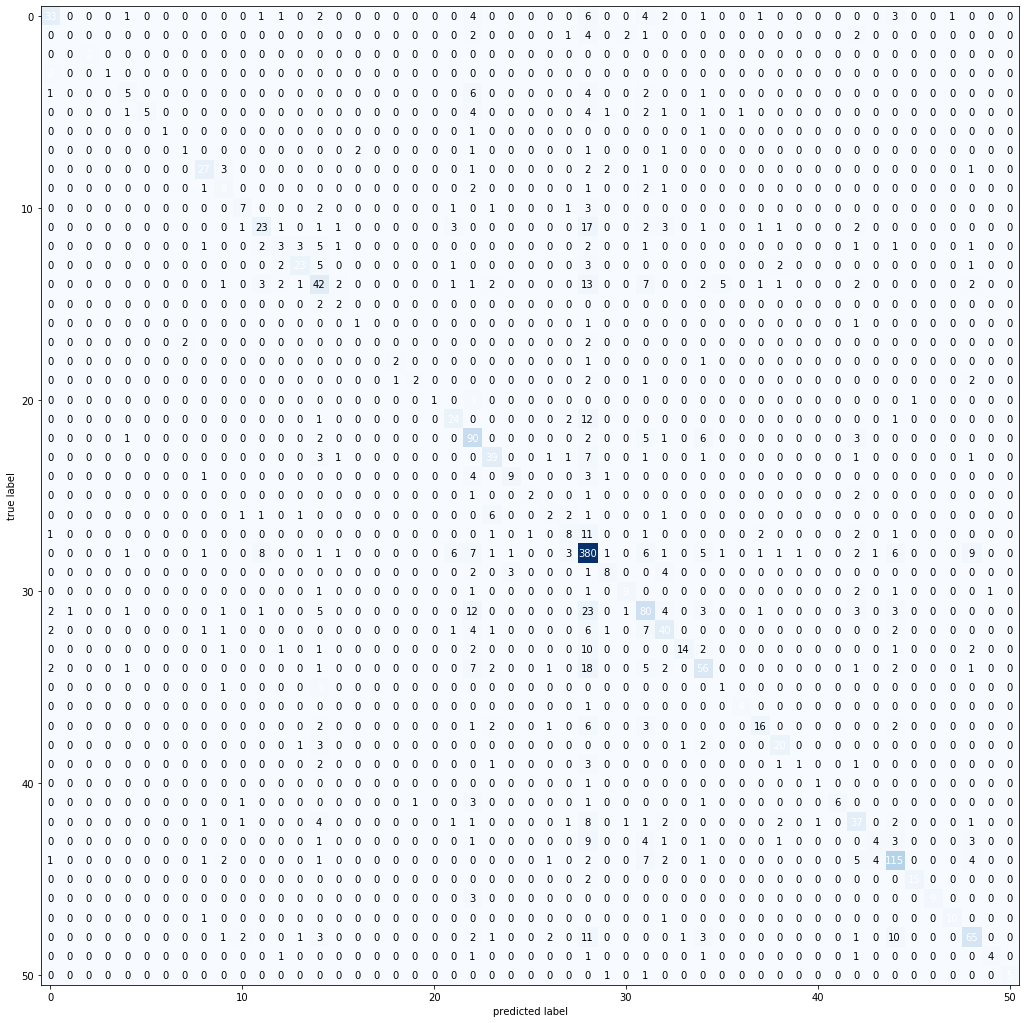

In [78]:
fig, ax = plot_confusion_matrix(conf_mat=confusion, figsize=(18,18))
plt.show()

In [79]:
f1_score(y_test_stem, pred, average="micro") ,f1_score(y_test_stem, pred, average="macro") 

/Users/antoine/Documents/Tests/interview/Posos/posos_interview/venvPosos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.6292974588938715, 0.5201364404954408)

# Word2vec

In [80]:
from gensim.models import Word2Vec
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pickle

In [81]:
input_train.shape

(8028, 2)

In [82]:
input_train.head()

,ID,question
0,0,"bonjour, je m suis trompé de forum pour ma qu..."
1,1,est ce que le motilium me soulagera contre les...
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...
3,3,Est-ce qu'il existe une forme adaptée aux enfa...
4,4,mon medecin me soigne pour une rhino pha...


In [83]:
stop_words_fr = stopwords.words("french")
cleaned_sentence_array = [re.sub(",|-|'|\.|\?" ," ", str(row)) for row  in input_train["question"]   ]
cleaned_sentence_array[0]             

'bonjour   je m suis trompé de forum pour ma question alors je la repose ici  je pris pour la première fois hier du paroxétine et ce matin c est une catastrophe  picotement dasn tous le corps annonciateur de sueur froide très très massive et de vomissement  j en suis à deux crises depuis 5 heure du mat  la cela semble passer mes mes mains reste moites et chaude estce normal pour la première fois merci a tous'

In [84]:
def get_sentence_splited_list(cleaned_sentence_array):
    sentence_splited_list = []
    for sentence in cleaned_sentence_array:
        new_splited_sentence = []
        for word in sentence.split(" "):
            if word and len(word) >2 and word not in stop_words_fr:
                new_splited_sentence.append(word.lower())
        sentence_splited_list.append(new_splited_sentence) 
    return sentence_splited_list
    

In [85]:
def get_vector_list(sentence_splited_list, w2v_model):
    empty_vector_list = []
    vector_list = []
    for index, word_list in enumerate(sentence_splited_list): #[1:2]:
        vocab_words = []
        for word in word_list:
            if word in w2v_model.wv.vocab.keys():
                vocab_words.append(w2v_model.wv[word])
        if not vocab_words:
            empty_vector_list.append(index)
        else:
            mean_vect = np.mean(vocab_words, axis=0)
            vector_list.append(mean_vect)
    return vector_list, empty_vector_list

In [86]:
sentence_splited_list = get_sentence_splited_list(cleaned_sentence_array)
splited_df = pd.DataFrame({"question_splited": sentence_splited_list})
splited_df.head()

,question_splited
0,"[bonjour, trompé, forum, question, alors, repo..."
1,"[motilium, soulagera, contre, nausées]"
2,"[médecin, prescrit, adenyl, 2ème, cachet, maux..."
3,"[est, existe, forme, adaptée, enfant, 5ans, mi..."
4,"[medecin, soigne, rhino, pharingite, prescrit,..."


In [87]:
from collections import defaultdict
word_freq = defaultdict(int)
for sent in sentence_splited_list:
    for w in sent:
        word_freq[w] += 1
len(word_freq)

10812

In [88]:
w2v_model = Word2Vec(sentence_splited_list,
                     min_count=10,
                     window=2,
                     size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     sg=1
                     )
vector_list, empty_vector_list = get_vector_list(sentence_splited_list, w2v_model)

In [89]:
w2v_model.wv.vocab.keys()

dict_keys(['bonjour', 'forum', 'question', 'alors', 'ici', 'pris', 'première', 'fois', 'hier', 'paroxétine', 'matin', 'tous', 'corps', 'très', 'vomissement', 'deux', 'crises', 'depuis', 'heure', 'cela', 'semble', 'passer', 'mains', 'reste', 'normal', 'merci', 'contre', 'nausées', 'médecin', 'prescrit', '2ème', 'cachet', 'maux', 'tête', 'palpitations', 'sueurs', 'chaleur', 'tremblements', 'dès', 'arrêt', 'médicament', 'symptômes', 'déjà', 'arrivé', 'quelqu', 'est', 'existe', 'forme', 'enfant', 'medecin', 'amoxicilline', 'comme', 'anti', 'vraiment', 'cette', 'indication', 'viens', 'enceinte', 'savez', 'peux', 'dangereux', 'long', 'terme', 'sous', 'mercilon', 'saignements', 'quoi', 'prend', 'trinordiol', 'fin', 'plaquette', 'copain', 'pilule', 'donc', 'bien', 'efficace', 'debut', 'douleur', 'poitrine', 'impression', 'peu', 'plus', 'mal', 'bas', 'dois', 'laroxyl', 'doses', 'stress', 'psy', 'dit', 'prendre', '50mg', 'sertraline', 'soir', 'peut', '100mg', 'midi', 'bientot', 'semaine', 'sais'

In [90]:
filename = 'models/word2vec_model.sav'
pickle.dump(w2v_model, open(filename, 'wb'))

In [91]:
len(vector_list)

7820

In [92]:
output_without_na = output_train.intention.copy()
for index in reversed(empty_vector_list):
    output_without_na.pop(index)


In [93]:
len(output_train.intention), len(output_without_na)

(8028, 7820)

In [94]:
len(empty_vector_list)

208

In [95]:
vector_list[:1]

[array([-0.11679669,  0.12990016,  0.14120783, -0.04367175, -0.08307907,
         0.16893338, -0.14071265,  0.08525995, -0.01262957, -0.3086473 ,
        -0.04076633, -0.2024457 ,  0.12071459, -0.08975048, -0.08944187,
         0.33501184,  0.21560176,  0.06492173, -0.07437339,  0.33040744,
        -0.22194448, -0.2676223 ,  0.3561023 ,  0.29838073,  0.18721114,
        -0.18110466, -0.10874292, -0.10249858, -0.07237063, -0.11125161,
        -0.15645413, -0.15768112,  0.04233959,  0.06685279,  0.10476375,
         0.00569374, -0.33375093, -0.28752175, -0.13510357,  0.01560076,
         0.00180404, -0.15270013,  0.00832085,  0.03049718, -0.10855345,
         0.03470321,  0.3121866 , -0.22215046, -0.37181967,  0.2910085 ,
        -0.1588487 ,  0.04789663,  0.44026834,  0.22981606, -0.2895481 ,
         0.10334448,  0.11447714, -0.04360408,  0.02725296, -0.02860413,
        -0.15189768,  0.05905133, -0.03060391, -0.07690564,  0.05916586,
         0.06923135, -0.05932782, -0.06006657,  0.0

In [96]:
x_train, x_test, y_train, y_test = train_test_split(vector_list, output_without_na) 

In [97]:
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

In [98]:
x_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.111925,0.129307,0.141558,-0.043782,-0.084129,0.168808,-0.137221,0.086814,-0.010854,-0.299929,...,0.483232,0.146076,-0.274840,0.026015,-0.224728,-0.133701,0.027651,0.217261,0.129836,0.002603
1,-0.116772,0.129039,0.137516,-0.042822,-0.080779,0.164934,-0.141155,0.085885,-0.014263,-0.308686,...,0.486434,0.145351,-0.275367,0.026701,-0.227274,-0.129302,0.029982,0.216058,0.126093,0.004863
2,-0.115130,0.129066,0.141634,-0.042853,-0.082276,0.167438,-0.140388,0.085439,-0.014314,-0.302858,...,0.485510,0.143848,-0.278317,0.025954,-0.226683,-0.132590,0.028765,0.218959,0.124296,0.004350
3,-0.118425,0.130075,0.143488,-0.043445,-0.083976,0.168663,-0.141298,0.085545,-0.014009,-0.311077,...,0.493167,0.144151,-0.281169,0.026133,-0.230639,-0.134949,0.028037,0.218502,0.130194,0.002830
4,-0.116159,0.130641,0.142601,-0.044436,-0.083375,0.170761,-0.141377,0.085693,-0.014262,-0.309632,...,0.493779,0.147001,-0.281813,0.026488,-0.228977,-0.134111,0.029017,0.221356,0.129402,0.004734


In [99]:
grid = {"gamma": [0.001, 0.01, 0.1,1,10, 100], "C":[0.001, 0.01, 0.1,1,10,100]}
#grid = {"gamma": [ 100, 1000], "C":[1000,100]}

In [100]:
gs_wv = GridSearchCV(SVC(probability=True),grid, cv=3)

In [101]:
gs_wv.fit(x_train_df, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [102]:
gs_wv.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [103]:
gs_wv.best_score_

0.45507246376811594

In [105]:
gs_wv.score(x_train_df, y_train), gs_wv.score(x_test_df, y_test)

(0.7067348678601876, 0.4884910485933504)

In [78]:
pred = gs_wv.predict(x_test_df)
confusion = confusion_matrix(y_test, pred)

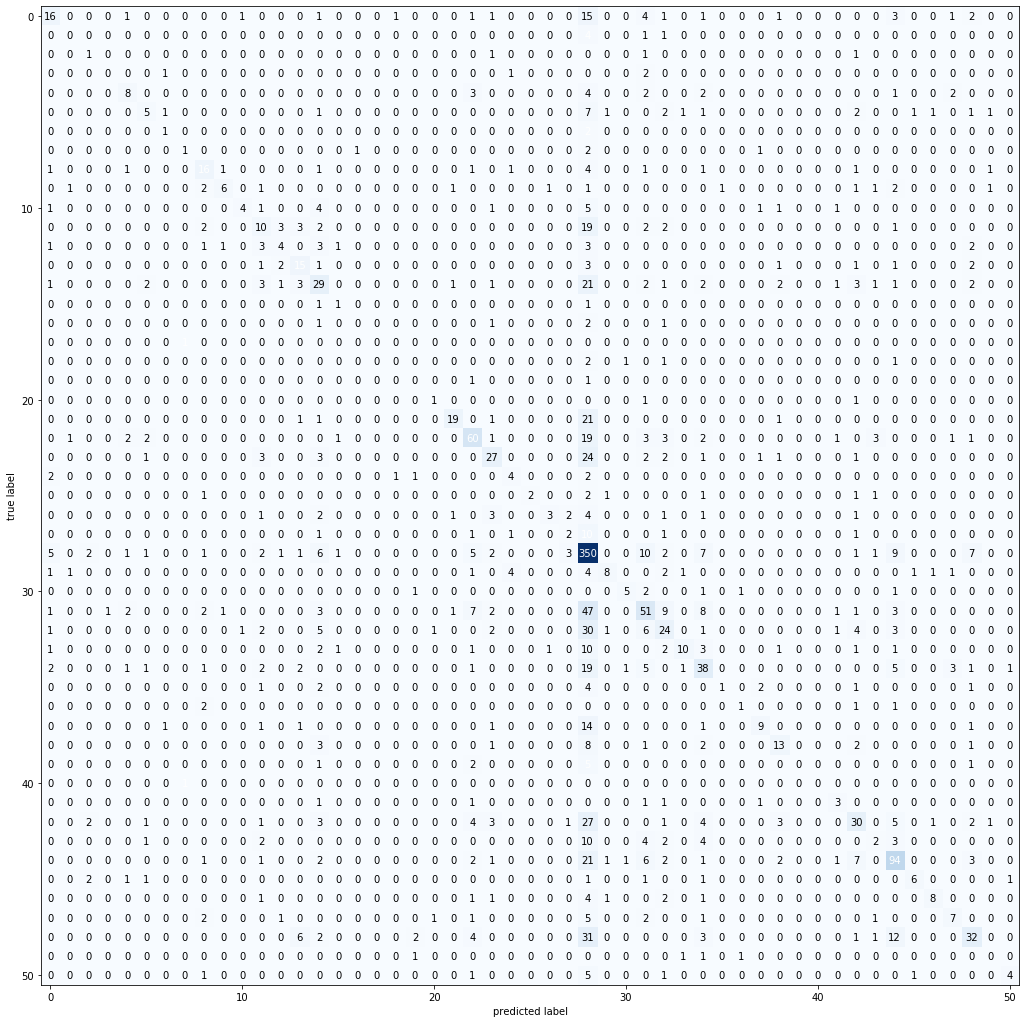

In [79]:
fig, ax = plot_confusion_matrix(conf_mat=confusion, figsize=(18,18))
plt.show()

In [80]:
f1_score(y_test, pred, average="micro") ,f1_score(y_test, pred, average="macro") 

/Users/antoine/Documents/Tests/interview/Posos/posos_interview/venvPosos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.4762148337595908, 0.3127344443525843)

In [81]:
filename_svm = 'models/svm_wv_model.sav'
pickle.dump(gs_wv.best_estimator_, open(filename_svm, 'wb'))

In [82]:
gs_wv.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [83]:
filename_svm = 'models/svm_wv_model.sav'

In [84]:
loaded_model = pickle.load(open(filename_svm, 'rb'))
loaded_model

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [85]:
loaded_model.score(x_test_df, y_test)

0.4762148337595908

In [86]:
# TEST on query

In [87]:
query_to_test = "risques poisson cru pendant la grossesse ?"

In [88]:
cleaned_query_to_test = [re.sub(",|-|'|\.|\?" ," ", str(query_to_test)).split(" ") ]

In [89]:
cleaned_query_to_test

[['risques', 'poisson', 'cru', 'pendant', 'la', 'grossesse', '', '']]

In [90]:
cleaned_query_vectorized = get_vector_list(cleaned_query_to_test, w2v_model) 

In [91]:
loaded_model.predict(cleaned_query_vectorized[0])

array([44])

In [99]:
cleaned_query_vectorized

([array([-0.0941275 ,  0.03645319, -0.1523491 ,  0.2320203 , -0.06239169,
          0.22209795, -0.0265361 , -0.04952991, -0.06219365,  0.11961462,
          0.07932341,  0.10187658,  0.03324719, -0.02323397, -0.16870777,
         -0.05632761, -0.12117753, -0.0696787 ,  0.0506738 ,  0.00545292,
          0.34525895,  0.00319484,  0.1154505 ,  0.19955695, -0.3469055 ,
         -0.12535048, -0.05605337,  0.30258453,  0.04672601, -0.06304171,
         -0.18323183, -0.0274012 ,  0.2814717 ,  0.00500825, -0.26435736,
          0.07674479, -0.08536127,  0.16636303, -0.08346764, -0.02971424,
          0.05281016, -0.0311511 ,  0.285229  , -0.2560178 ,  0.16080983,
          0.05450256,  0.08472773,  0.03443843, -0.00888435, -0.41215757,
         -0.10152227, -0.03409123,  0.08301149, -0.04246217,  0.248226  ,
          0.13006932,  0.35104397,  0.04498231,  0.05716096, -0.5137158 ,
         -0.02380779, -0.10377884,  0.1712842 , -0.04171622, -0.13175313,
          0.16798162, -0.04106819, -0.

In [97]:
cleaned_query_vectorized[0]

[array([-0.0941275 ,  0.03645319, -0.1523491 ,  0.2320203 , -0.06239169,
         0.22209795, -0.0265361 , -0.04952991, -0.06219365,  0.11961462,
         0.07932341,  0.10187658,  0.03324719, -0.02323397, -0.16870777,
        -0.05632761, -0.12117753, -0.0696787 ,  0.0506738 ,  0.00545292,
         0.34525895,  0.00319484,  0.1154505 ,  0.19955695, -0.3469055 ,
        -0.12535048, -0.05605337,  0.30258453,  0.04672601, -0.06304171,
        -0.18323183, -0.0274012 ,  0.2814717 ,  0.00500825, -0.26435736,
         0.07674479, -0.08536127,  0.16636303, -0.08346764, -0.02971424,
         0.05281016, -0.0311511 ,  0.285229  , -0.2560178 ,  0.16080983,
         0.05450256,  0.08472773,  0.03443843, -0.00888435, -0.41215757,
        -0.10152227, -0.03409123,  0.08301149, -0.04246217,  0.248226  ,
         0.13006932,  0.35104397,  0.04498231,  0.05716096, -0.5137158 ,
        -0.02380779, -0.10377884,  0.1712842 , -0.04171622, -0.13175313,
         0.16798162, -0.04106819, -0.06219684,  0.1

In [93]:
loaded_model.predict_proba(cleaned_query_vectorized[0])

array([[2.83425696e-03, 9.77740230e-04, 3.04240081e-03, 6.67662232e-04,
        3.67323709e-03, 8.06496716e-03, 2.12654467e-03, 1.82882905e-03,
        9.64227203e-03, 1.60204634e-03, 1.69850244e-03, 7.95199375e-04,
        1.00155360e-03, 6.55596286e-04, 4.36097266e-03, 6.17396546e-04,
        2.22466613e-03, 5.90876556e-03, 2.07193277e-03, 3.99797039e-04,
        1.62799129e-03, 3.08929588e-03, 3.79995176e-03, 2.03171196e-03,
        2.58400114e-03, 5.08658591e-03, 7.51627882e-03, 3.16940530e-03,
        2.36475763e-02, 2.88819989e-03, 1.15979310e-02, 3.50051940e-03,
        2.07041352e-02, 6.52235254e-03, 8.32572921e-03, 3.13096574e-03,
        1.13690291e-03, 7.77060976e-03, 1.54734710e-03, 3.01148645e-03,
        7.68249335e-04, 2.14590236e-03, 6.39168877e-03, 1.19001151e-02,
        6.92131252e-01, 2.31965332e-03, 5.45274796e-03, 1.12855427e-03,
        9.91959005e-02, 1.21843321e-03, 4.64186144e-04]])

In [94]:
np.argmax(loaded_model.predict_proba(cleaned_query_vectorized[0]))

44

In [95]:
loaded_model.predict_proba(cleaned_query_vectorized[0])[0][44]

0.6921312524380857